In [3]:
import pandas as pd
df = pd.read_csv('movie_metadata.csv')
#displaying/fetching IMDB data
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [2]:
# Get most popular actors
# Which actor has more number of movies

import pandas as pd
import matplotlib
import plotly.plotly as py
py.sign_in('mvshisht','dLZGQPw059uOgTxY4ORl')
import cufflinks as cf
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df = pd.read_csv('movie_metadata.csv')
#df['actor_1_name'].value_counts()

#Plot top 50 popular actors
dt = df['actor_1_name'].value_counts()
dt.head(50).iplot(kind='bar',yTitle='Number of movies',title='Top 50 popular Actors')


AttributeError: 'Series' object has no attribute 'iplot'

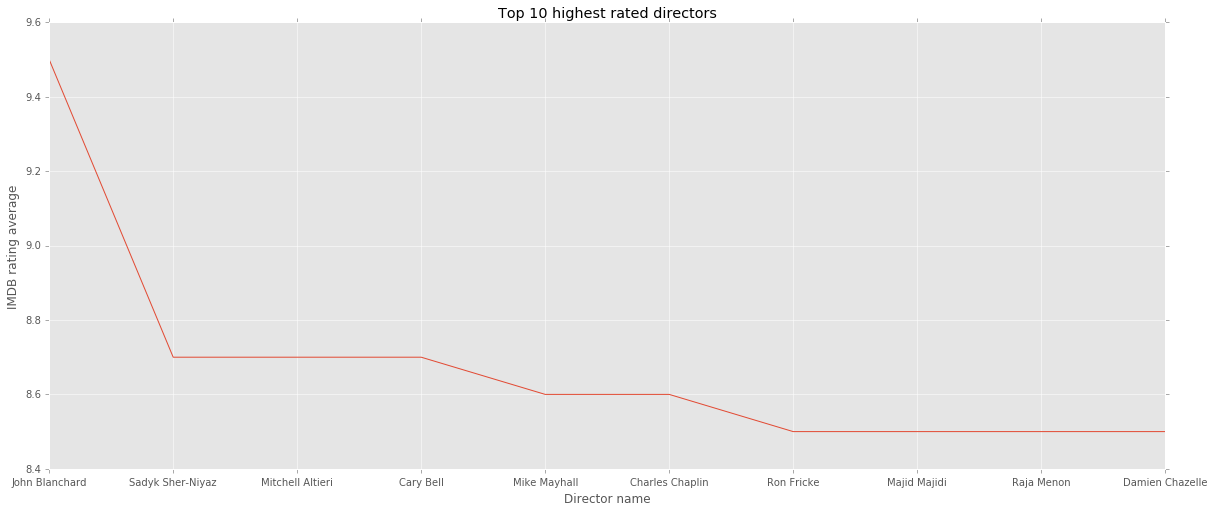

In [4]:
# top 10 directors
#Directors with highest IMDB rated movies

%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

df = pd.read_csv('movie_metadata.csv')
#df['actor_1'].value_counts()

#We calculate the average rating of all director's movies and deduce that directors with high mean of imdb rating were successful
dt = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False)
dt.head(10).plot.line(figsize=(20, 8))
plt.title('Top 10 highest rated directors')
plt.xlabel('Director name')
plt.ylabel('IMDB rating average')
plt.show()


In [1]:
# Highest rated actors
# Actors who have movies with higher IMDB Rating


import pandas as pd
import matplotlib
import plotly.plotly as py
py.sign_in('mvshisht', 'dLZGQPw059uOgTxY4ORl')
import cufflinks as cf
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df = pd.read_csv('movie_metadata.csv')
#df['actor_1'].value_counts()

#Taking the mean of IMDB rating of movies of all actors and displaying top 10 with highest avg
dt = df.groupby('actor_1_name')['imdb_score'].mean().sort_values(ascending=False)
dt.head(10).iplot(kind='bar', yTitle='Avg IMDB rating', title='Actors with best performance')

ImportError: No module named 'cufflinks'

In [6]:
#Most rated Genre of movies

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

data = pd.read_csv('movie_metadata.csv')

#cleanup
dt = data[['genres','movie_title','language','title_year','imdb_score','duration']]

#spliting/cleaning the genre column for single enteries
gsplit = dt['genres'].str.split('|').apply(Series, 1).stack()
gsplit.index = gsplit.index.droplevel(-1)
gsplit.name = 'genres'
del dt['genres']
df = dt.join(gsplit)
df.head()

#Getting list of all unique generes so that duplication doesnt change the result
df['genres'].unique()

#Movies with IMDB rating equal or above 8
df1 = df[df['imdb_score']>=8]
df1.head()

#Cleaning up data for fetching title and genre and getting a total number
df2 = (pd.DataFrame(df1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )
df2

#Plotting genre on pie chart for clear comparison 
fig = {
   'data':[{'labels':['Drama','Adventure','Crime','Thriller','Action','Comedy','Romance','Sci-Fi','Biography','Fantasy','Mystery','War','Family','History','Documentary','Animation','Horror','Sport','Western','Music','Musical','Film-Noir','News'],
    'values':[219,70,62,62,57,55,44,43,37,35,34,34,31,27,23,23,13,11,11,8,7,2,1],
    'type': 'pie'}],
    #'layout': {'title': 'Movies per Genre'}
     }
py.iplot(fig)

In [7]:
#Also plotting Genre v/s IMDB rating on bar chart
df2.iplot(kind='bar', yTitle='Rating', title='Popular Genre')